# Exploratory Data Analysis for Counsel-chat Data

## Step 1: Import required libraries, read the data and print a sample

In [97]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import numpy as np

chat_data = pd.read_csv('data/20200325_counsel_chat.csv')

chat_data.head(5)

,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
0,0,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,"If everyone thinks you're worthless, then mayb...",1,2899,train
1,1,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in...",https://counselchat.com/therapists/robin-landw...,"Hello, and thank you for your question and see...",1,3514,train
2,2,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Lee KingI use an integrative approach to treat...,https://counselchat.com/therapists/lee-king,First thing I'd suggest is getting the sleep y...,0,5,train
3,3,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Shauntai Davis-YearginPersonalized, private on...",https://counselchat.com/therapists/shauntai-da...,Therapy is essential for those that are feelin...,0,31,train
4,4,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Jordan WhiteLicensed Social Worker at Oak Root...,https://counselchat.com/therapists/jordan-white,I first want to let you know that you are not ...,0,620,train


## Step 2: Get a basic understanding of the dataset

### Shape

In [14]:
chat_data.shape

(2129, 12)

### Number of records

In [15]:
chat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2129 non-null   int64 
 1   questionID     2129 non-null   int64 
 2   questionTitle  2129 non-null   object
 3   questionText   2129 non-null   object
 4   questionLink   2129 non-null   object
 5   topic          2129 non-null   object
 6   therapistInfo  2129 non-null   object
 7   therapistURL   2129 non-null   object
 8   answerText     2129 non-null   object
 9   upvotes        2129 non-null   int64 
 10  views          2129 non-null   int64 
 11  split          2129 non-null   object
dtypes: int64(4), object(8)
memory usage: 199.7+ KB


In [16]:
chat_data.isnull().sum()

Unnamed: 0       0
questionID       0
questionTitle    0
questionText     0
questionLink     0
topic            0
therapistInfo    0
therapistURL     0
answerText       0
upvotes          0
views            0
split            0
dtype: int64

This indicates that all values in this dataset is null. For the sake of a faster delivery on the POC, I am assuming that there aren't any other issues with the data and that it is clean.

In [100]:
chat_data.describe()

,Unnamed: 0,questionID,upvotes,views
count,2129.000000,2129.000000,2129.000000,2129.000000
mean,1064.000000,346.854861,0.489901,198.604979
std,614.733682,273.706241,0.942429,300.314280
min,0.000000,0.000000,0.000000,2.000000
25%,532.000000,78.000000,0.000000,58.000000
50%,1064.000000,321.000000,0.000000,107.000000
75%,1596.000000,588.000000,1.000000,210.000000
max,2128.000000,884.000000,9.000000,3514.000000


In [91]:
chat_data.nunique()

Unnamed: 0       2129
questionID        815
questionTitle     818
questionText      824
questionLink      824
topic              31
therapistInfo     307
therapistURL      307
answerText       2008
upvotes             9
views             531
split               3
question_len      444
answer_len       1224
dtype: int64

In [102]:
answers_per_question = chat_data.groupby('questionID')['answerText'].count()
average_answers = answers_per_question.mean()

print(f"Average number of answers per question: {average_answers:.2f}")

Average number of answers per question: 2.61


In [103]:
answers_per_question = chat_data.groupby('questionID')['answerText'].count()

max_answers = answers_per_question.max()
min_answers = answers_per_question.min()

print(f"Maximum number of answers to a question: {max_answers}")
print(f"Minimum number of answers to a question: {min_answers}")

Maximum number of answers to a question: 49
Minimum number of answers to a question: 1


In [19]:
chat_data.topic.unique()

array(['depression', 'anxiety', 'parenting', 'self-esteem',
       'relationship-dissolution', 'workplace-relationships',
       'spirituality', 'trauma', 'domestic-violence', 'anger-management',
       'sleep-improvement', 'intimacy', 'grief-and-loss',
       'substance-abuse', 'family-conflict', 'marriage',
       'eating-disorders', 'relationships', 'lgbtq', 'behavioral-change',
       'addiction', 'legal-regulatory', 'professional-ethics', 'stress',
       'human-sexuality', 'social-relationships', 'children-adolescents',
       'military-issues', 'self-harm', 'diagnosis',
       'counseling-fundamentals'], dtype=object)

In [20]:
chat_data[chat_data['topic']=='diagnosis']

,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
1867,1867,3,How do therapists characterize personality types?,How do therapists classify the type of persona...,https://counselchat.com/questions/how-do-thera...,diagnosis,Emily PagonePsychotherapist at Naperville Coun...,https://counselchat.com/therapists/emily-pagone,"This is a great question, and I am happy to ha...",2,861,train
1868,1868,3,How do therapists characterize personality types?,How do therapists classify the type of persona...,https://counselchat.com/questions/how-do-thera...,diagnosis,"Eric Ström, JD, MA, LMHCAttorney & Licensed Me...",https://counselchat.com/therapists/eric-str-m-...,That's a great question. There is such a wide ...,1,371,train
1869,1869,3,How do therapists characterize personality types?,How do therapists classify the type of persona...,https://counselchat.com/questions/how-do-thera...,diagnosis,"Dr. Timothy Paul'man'; Online - ""Natural Healt...",https://counselchat.com/therapists/dr-timothy-...,"Not very well :)So, you got the Jungians, and ...",0,15,train
1870,1870,3,How do therapists characterize personality types?,How do therapists classify the type of persona...,https://counselchat.com/questions/how-do-thera...,diagnosis,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,In my therapy practice I avoid characterizing ...,0,65,train
1871,1871,5,Why can't I stop these thoughts?,I keep having these random thoughts that I don...,https://counselchat.com/questions/why-can-t-i-...,diagnosis,"Brenda Whelan, LMHCMind, Body, Spirit Counseling",https://counselchat.com/therapists/brenda-whel...,I think we all go through a period of time whe...,1,1247,train
1872,1872,5,Why can't I stop these thoughts?,I keep having these random thoughts that I don...,https://counselchat.com/questions/why-can-t-i-...,diagnosis,"Christina McGrath Fair""Enlightenment is when a...",https://counselchat.com/therapists/christina-m...,There is nothing wrong with you! Sometimes we ...,0,19,train
1873,1873,5,Why can't I stop these thoughts?,I keep having these random thoughts that I don...,https://counselchat.com/questions/why-can-t-i-...,diagnosis,"Siena Blanco, MS LCPCBe transformed by the ren...",https://counselchat.com/therapists/siena-blanc...,We all suffer from random thoughts from time t...,0,127,train
1874,1874,5,Why can't I stop these thoughts?,I keep having these random thoughts that I don...,https://counselchat.com/questions/why-can-t-i-...,diagnosis,Kevin MimmsBuilding Better Connections,https://counselchat.com/therapists/kevin-mimms,A lot of times the thoughts we have about ours...,0,123,train
1875,1875,5,Why can't I stop these thoughts?,I keep having these random thoughts that I don...,https://counselchat.com/questions/why-can-t-i-...,diagnosis,"David KleinHumanistic, LGBT-Affirmative Psycho...",https://counselchat.com/therapists/david-klein,Those kinds of thoughts can be quite difficult...,0,94,train
1876,1876,5,Why can't I stop these thoughts?,I keep having these random thoughts that I don...,https://counselchat.com/questions/why-can-t-i-...,diagnosis,Brenda HenningHere to help you get better,https://counselchat.com/therapists/brenda-henning,We have thousands of thoughts a day. Some thou...,0,63,train


In [22]:
chat_data[chat_data['topic']=='counseling-fundamentals']

,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
1889,1889,10,How would I know if I have the right therapist?,How do you know you have the right therapist f...,https://counselchat.com/questions/how-would-i-...,counseling-fundamentals,Jennifer MolinariHypnotherapist & Licensed Cou...,https://counselchat.com/therapists/jennifer-mo...,Finding the right therapist for you is very im...,1,2755,train
1890,1890,10,How would I know if I have the right therapist?,How do you know you have the right therapist f...,https://counselchat.com/questions/how-would-i-...,counseling-fundamentals,Leah ElvitskyHelping you thrive and not just s...,https://counselchat.com/therapists/leah-elvitsky,If your therapist is attentive and compassiona...,0,5,train
1891,1891,10,How would I know if I have the right therapist?,How do you know you have the right therapist f...,https://counselchat.com/questions/how-would-i-...,counseling-fundamentals,Christianne PortaUnderstand. Heal. Grow,https://counselchat.com/therapists/christianne...,"When you find the right therapist, you will fe...",0,9,train
1892,1892,10,How would I know if I have the right therapist?,How do you know you have the right therapist f...,https://counselchat.com/questions/how-would-i-...,counseling-fundamentals,Kayla MooreCounseling for Innovative Millennia...,https://counselchat.com/therapists/kayla-moore,The most important agent of change in therapy ...,0,27,train
1893,1893,10,How would I know if I have the right therapist?,How do you know you have the right therapist f...,https://counselchat.com/questions/how-would-i-...,counseling-fundamentals,"Jennifer Barajas, MS, LPCE-Counseling so you c...",https://counselchat.com/therapists/jennifer-ba...,You know have the right therapist if:Your coun...,0,23,train
...,...,...,...,...,...,...,...,...,...,...,...,...
2124,2124,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,Victoria HaagFind direction for your life...,https://counselchat.com/therapists/victoria-haag,There are probably no two therapists alike bec...,0,45,train
2125,2125,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,Allison VelezIs your relationship worth it?,https://counselchat.com/therapists/allison-velez,"Each counselor may have a different process, s...",0,37,train
2126,2126,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,David RouttPresident and Clinical Counselor at...,https://counselchat.com/therapists/david-routt,"After meeting a client, many Counselors will a...",0,56,train
2127,2127,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,2nd Chance Counseling Service Online Addiction...,https://counselchat.com/therapists/2nd-chance-...,A good therapist will discuss what brought you...,0,27,train


In [101]:
chat_data[chat_data['topic']=='legal-regulatory']

,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
1776,1776,842,Unethical Therapy Practices,What do you do when a therapist and a parent d...,https://counselchat.com/questions/unethical-th...,legal-regulatory,"Eric Ström, JD, MA, LMHCAttorney & Licensed Me...",https://counselchat.com/therapists/eric-str-m-...,This sounds like a potentially serious situati...,5,2818,train
1777,1777,842,Unethical Therapy Practices,What do you do when a therapist and a parent d...,https://counselchat.com/questions/unethical-th...,legal-regulatory,"Kristi King-Morgan, LMSWSocial Worker, Psychot...",https://counselchat.com/therapists/kristi-king...,I will admit I am confused about this question...,4,772,train
1778,1778,843,Is it a normal practice for a team of doctors ...,They discontinued treatment for no apparent re...,https://counselchat.com/questions/is-it-a-norm...,legal-regulatory,"Eric Ström, JD, MA, LMHCAttorney & Licensed Me...",https://counselchat.com/therapists/eric-str-m-...,The general rule against medical abandonment s...,2,1271,train
1779,1779,844,Is there anything I can do about my therapist ...,I had a dispute with my therapist regarding an...,https://counselchat.com/questions/is-there-any...,legal-regulatory,"Eric Ström, JD, MA, LMHCAttorney & Licensed Me...",https://counselchat.com/therapists/eric-str-m-...,My recommendation would be to try to talk to y...,2,1518,train
1780,1780,847,Is it ethical for a social worker to ignore a ...,I terminated my counseling relationship with a...,https://counselchat.com/questions/is-it-ethica...,legal-regulatory,"Eric Ström, JD, MA, LMHCAttorney & Licensed Me...",https://counselchat.com/therapists/eric-str-m-...,Mental health providers should promptly return...,1,255,train
1781,1781,847,Is it ethical for a social worker to ignore a ...,I terminated my counseling relationship with a...,https://counselchat.com/questions/is-it-ethica...,legal-regulatory,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,"Yes, your former social worker should return y...",0,62,train
1782,1782,849,How can I see if a therapist if my mom can't a...,"I think I have depression, anxiety, bipolar di...",https://counselchat.com/questions/how-can-i-se...,legal-regulatory,"Eric Ström, JD, MA, LMHCAttorney & Licensed Me...",https://counselchat.com/therapists/eric-str-m-...,It can be difficult to get counseling if you d...,1,102,train
1783,1783,850,"I told my family doctor yesterday, that I am h...","I have major depression, severe, PTSD, anxiety...",https://counselchat.com/questions/i-told-my-fa...,legal-regulatory,"Eric Ström, JD, MA, LMHCAttorney & Licensed Me...",https://counselchat.com/therapists/eric-str-m-...,Your doctor might be required to tell your psy...,4,214,train


## Step 3: Topic Analysis

### Topic Frequency

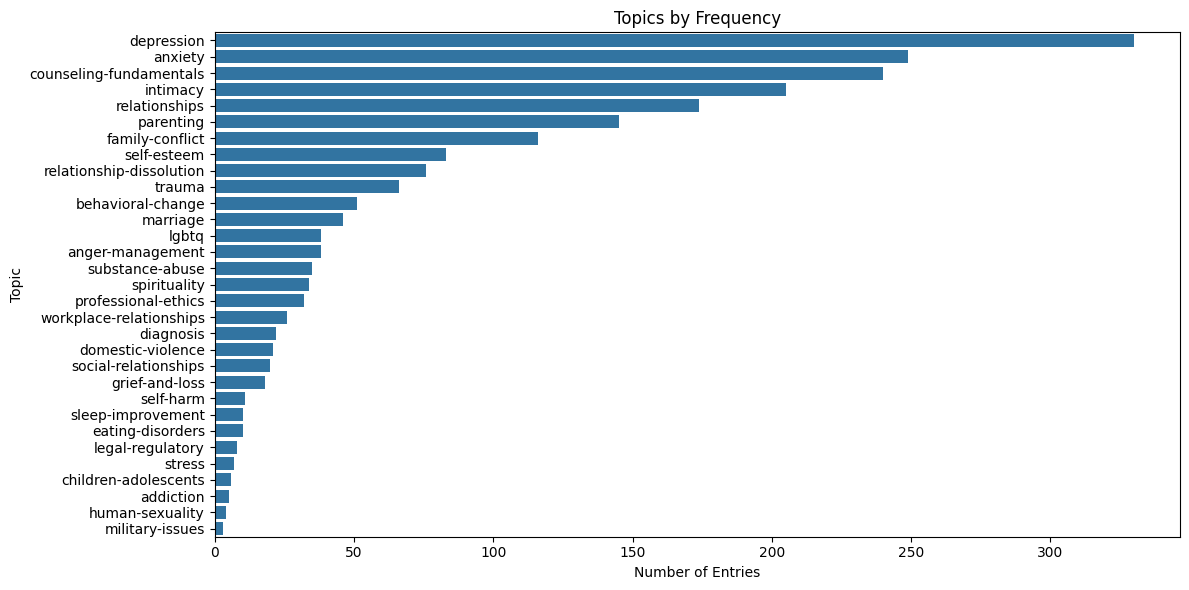

In [26]:
top_topics = chat_data['topic'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=top_topics.values, y=top_topics.index)
plt.title('Topics by Frequency')
plt.xlabel('Number of Entries')
plt.ylabel('Topic')
plt.tight_layout()
plt.show()

Initially my idea was to include a few samples of what the advice might sound like for a given question when making an API call to OPENAI (Low-shot learning). If I were to do multi-topic selections, I may not always get an exact match for examples to fine-tune.

### Content Gaps & High Demand Topics

In [99]:
# Topic counts (supply)
topic_counts = chat_data.groupby('topic')['questionID'].nunique()

# Engagement (demand)
topic_engagement = chat_data.groupby('topic')[['views', 'upvotes']].mean()

# Combine
topic_analysis = pd.concat([topic_counts.rename('question_count'), topic_engagement], axis=1)

# Add engagement ratio (views per question)
topic_analysis['views_per_question'] = topic_analysis['views'] / topic_analysis['question_count']

# Sort by most underserved (few questions, high views)
topic_analysis.sort_values(by='views_per_question', ascending=False).head(10)


,question_count,views,upvotes,views_per_question
topic,,,,
military-issues,1,781.000000,1.000000,781.000000
addiction,3,684.400000,1.000000,228.133333
legal-regulatory,6,876.500000,2.375000,146.083333
self-harm,2,237.727273,1.272727,118.863636
eating-disorders,4,418.000000,1.500000,104.500000
sleep-improvement,5,340.400000,0.500000,68.080000
children-adolescents,2,118.833333,0.166667,59.416667
diagnosis,6,278.954545,0.227273,46.492424
professional-ethics,6,235.593750,0.843750,39.265625


Few insights and thoughts come to mind-
1) The topic `military-issues️` shows high interest but only one question is available in the dataset. This could use more coverage.
2) More questions could be added for the `self-harm`, `eating-disorders` and `addiction` topics as well for the same reason.
3) `legal-regulatory` Patients and Therapists alike may be curious about legal questions/ need ethical guidance. This could be a valuable future development or feature.

## Step 4: Textual Analysis for Questions and Answers

### Question & Answer Length Distributions

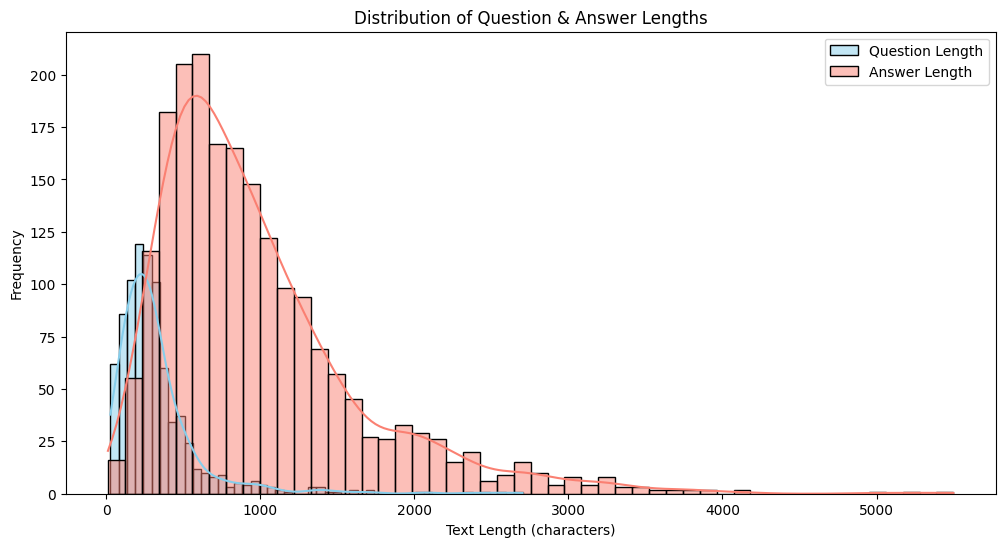

In [58]:
chat_data['question_len'] = chat_data['questionText'].drop_duplicates().apply(len)
chat_data['answer_len'] = chat_data['answerText'].drop_duplicates().apply(len)

plt.figure(figsize=(12,6))
sns.histplot(chat_data['question_len'], bins=50, kde=True, color='skyblue', label='Question Length')
sns.histplot(chat_data['answer_len'], bins=50, kde=True, color='salmon', label='Answer Length')
plt.legend()
plt.title('Distribution of Question & Answer Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

### Most Common Words

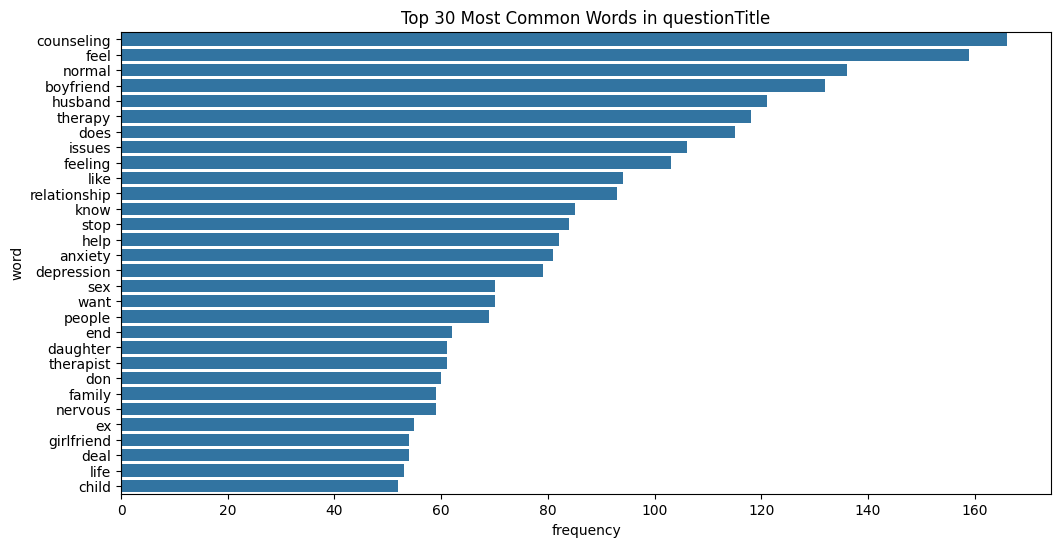

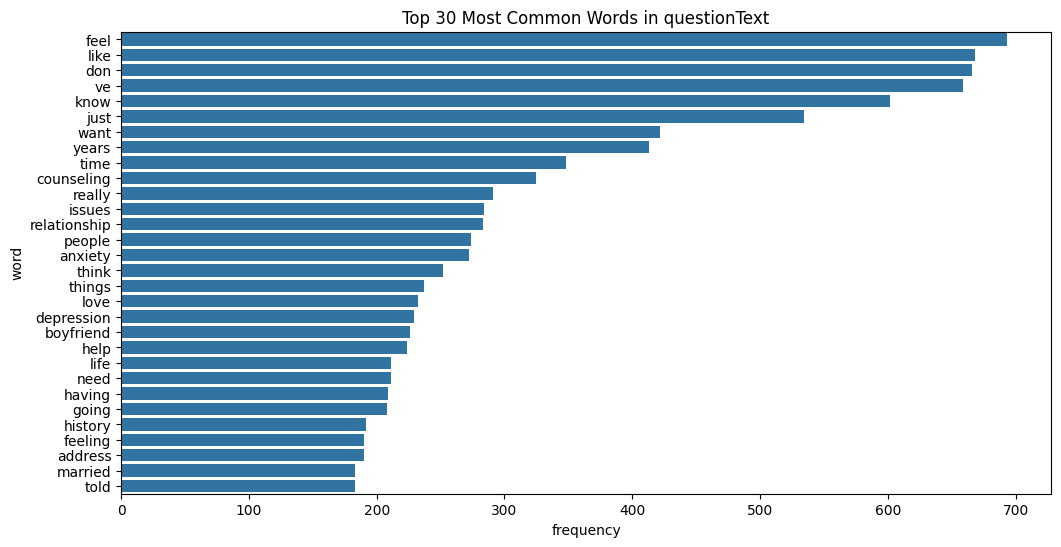

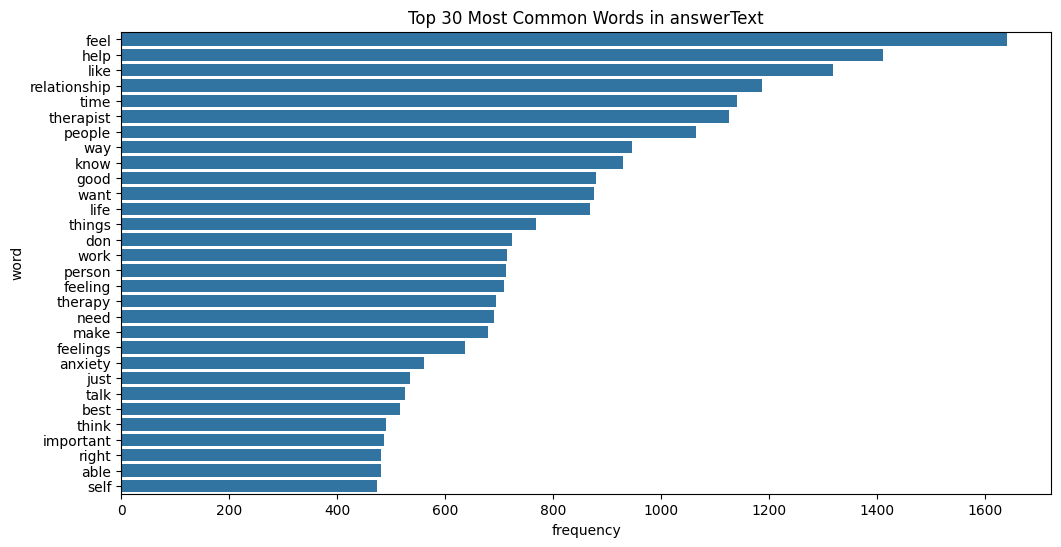

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to chart most common words

def get_most_common_words_bar_chart(columnsName):
    vectorizer = CountVectorizer(stop_words='english', max_features=30)
    texts = chat_data[columnsName].fillna('')
    X = vectorizer.fit_transform(texts)
    word_freq = X.toarray().sum(axis=0)
    words = vectorizer.get_feature_names_out()

    word_df = pd.DataFrame({'word': words, 'frequency': word_freq}).sort_values(by='frequency', ascending=False)

    plt.figure(figsize=(12,6))
    sns.barplot(x='frequency', y='word', data=word_df)
    plt.title(f'Top 30 Most Common Words in {columnsName}')
    plt.show()

get_most_common_words_bar_chart('questionTitle')
get_most_common_words_bar_chart('questionText')
get_most_common_words_bar_chart('answerText')

Since the above chart includes non-relevant words, it might be worth analyzing specifically the nouns and adjectives

In [83]:
# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 2_000_000

# Convert to DataFrame
def plot_pos_freq(freq_list, title):
    words, counts = zip(*freq_list)
    plt.figure(figsize=(10,6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.tight_layout()
    plt.show()

def get_most_common_nouns_and_adjectives_bar_chart(columnName):

    # Combine all texts
    unique_texts = chat_data[columnName].drop_duplicates().tolist()
    all_text = ' '.join(unique_texts)  # For spaCy processing

    # Process text and filter nouns/adjectives
    doc = nlp(all_text)

    # Extract nouns and adjectives
    nouns = [token.text.lower() for token in doc if token.pos_ == 'NOUN' and not token.is_stop and token.is_alpha]
    adjectives = [token.text.lower() for token in doc if token.pos_ == 'ADJ' and not token.is_stop and token.is_alpha]

    # Count most common
    noun_freq = Counter(nouns).most_common(20)
    adj_freq = Counter(adjectives).most_common(20)

    plot_pos_freq(noun_freq, f'Top 20 Nouns in {columnName}')
    plot_pos_freq(adj_freq, f'Top 20 Adjectives in {columnName}')



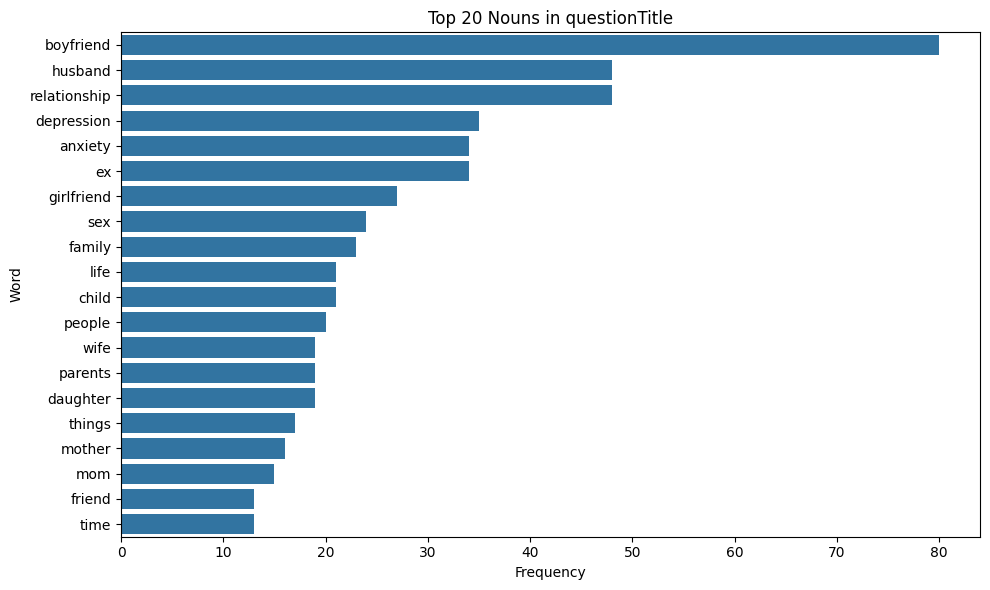

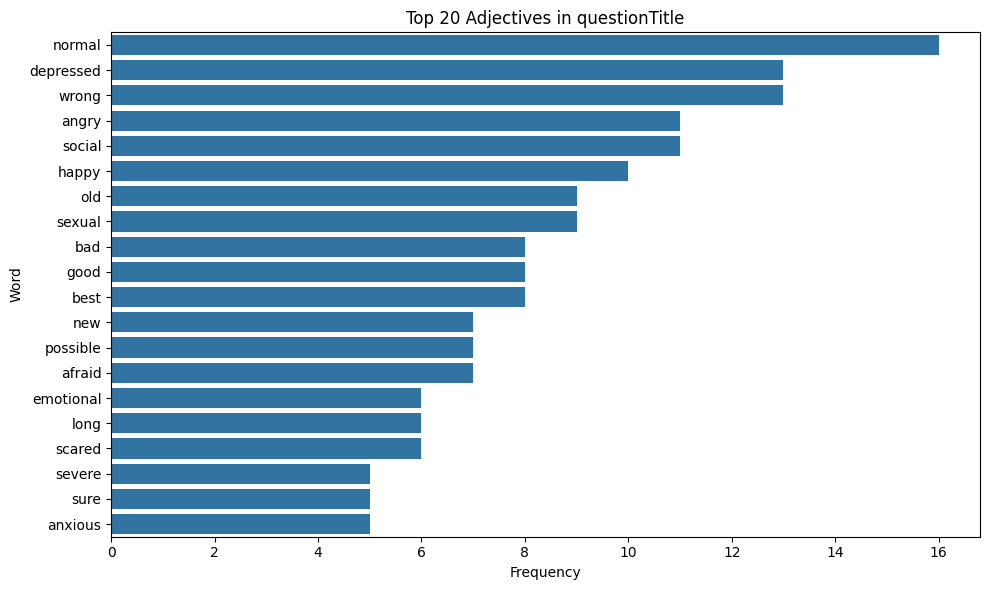

In [80]:
get_most_common_nouns_and_adjectives_bar_chart('questionTitle')


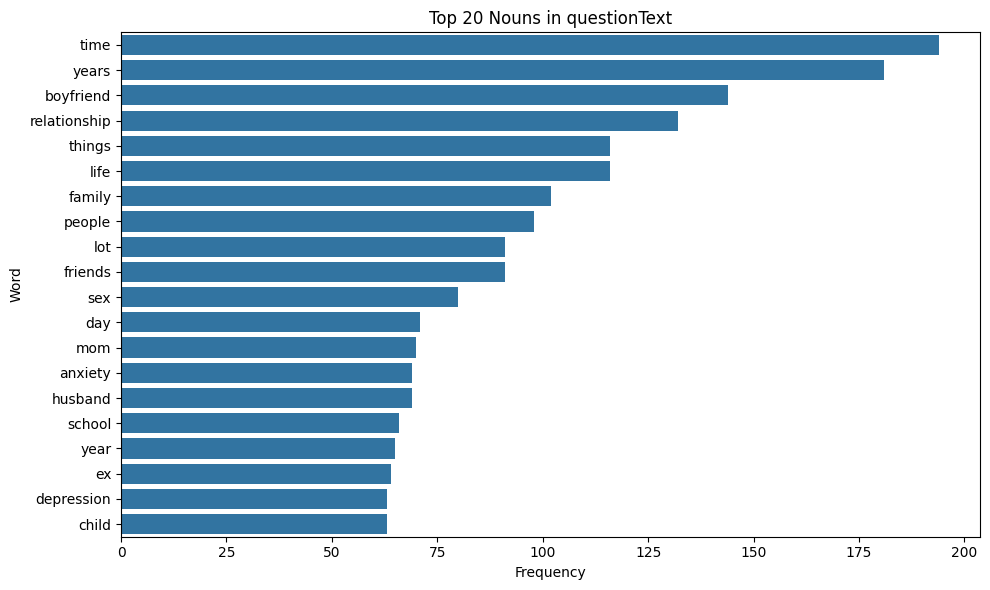

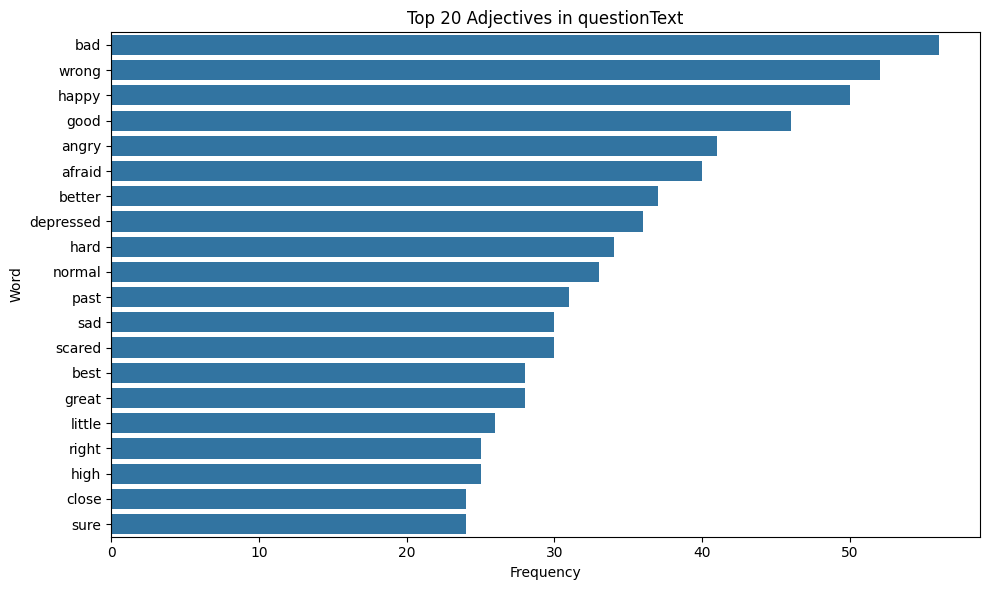

In [84]:
get_most_common_nouns_and_adjectives_bar_chart('questionText')

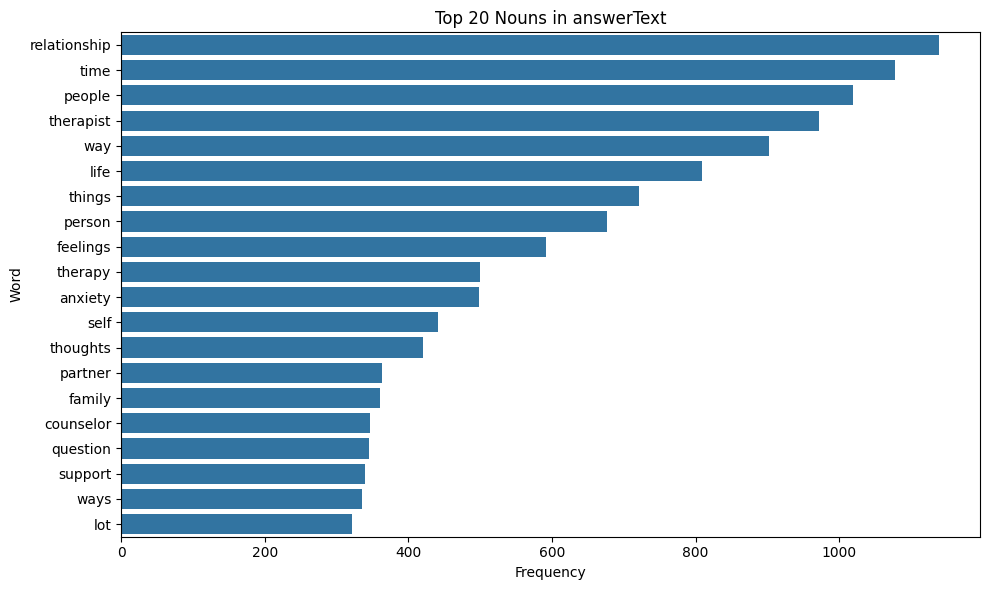

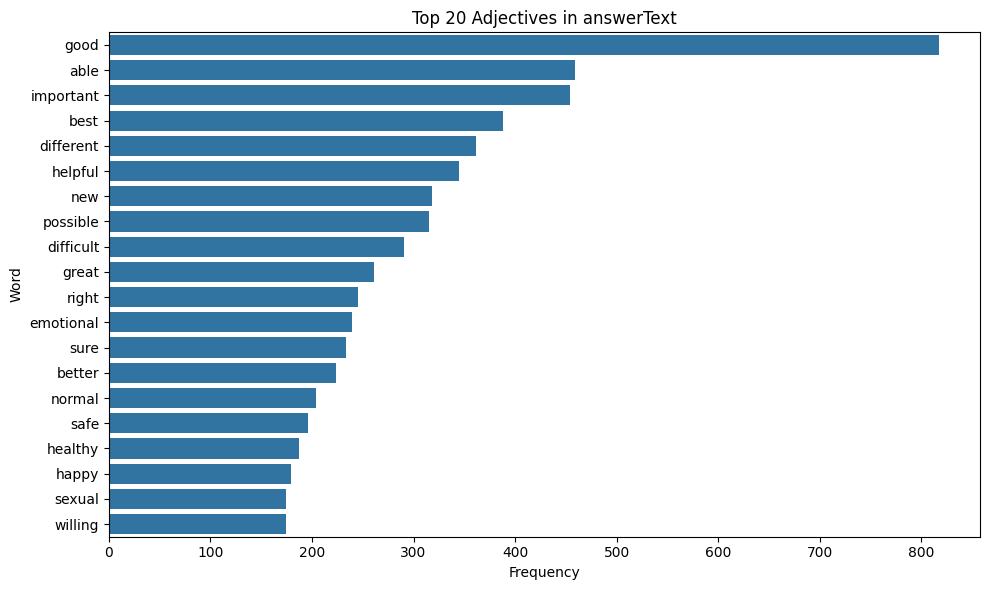

In [85]:
get_most_common_nouns_and_adjectives_bar_chart('answerText')

In [87]:
def get_top_ngrams(texts, ngram_range=(2,2), top_n=20):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=ngram_range)
    X = vectorizer.fit_transform(texts)
    counts = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    freq_dist = dict(zip(vocab, counts))
    sorted_ngrams = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return sorted_ngrams

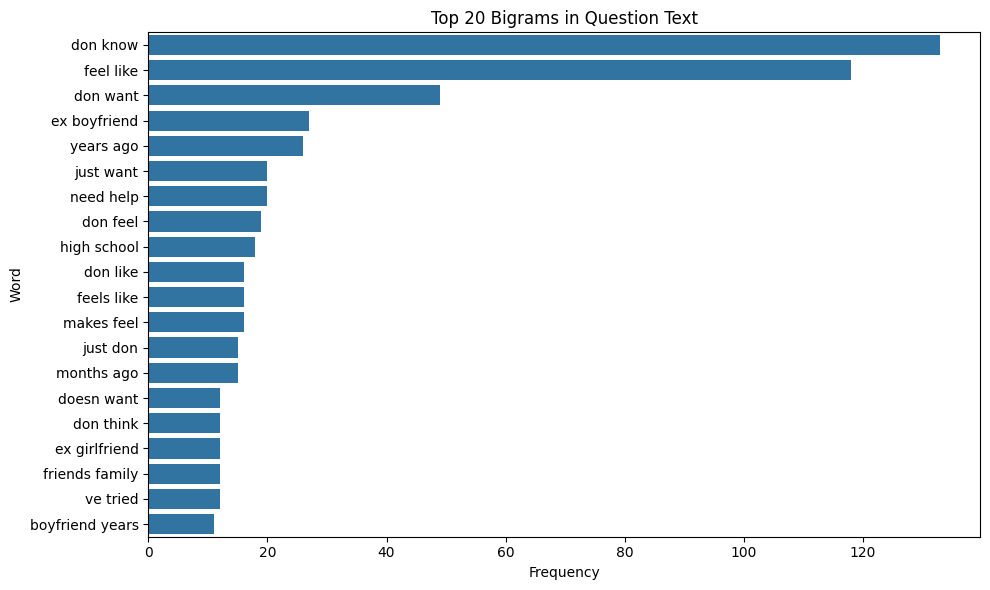

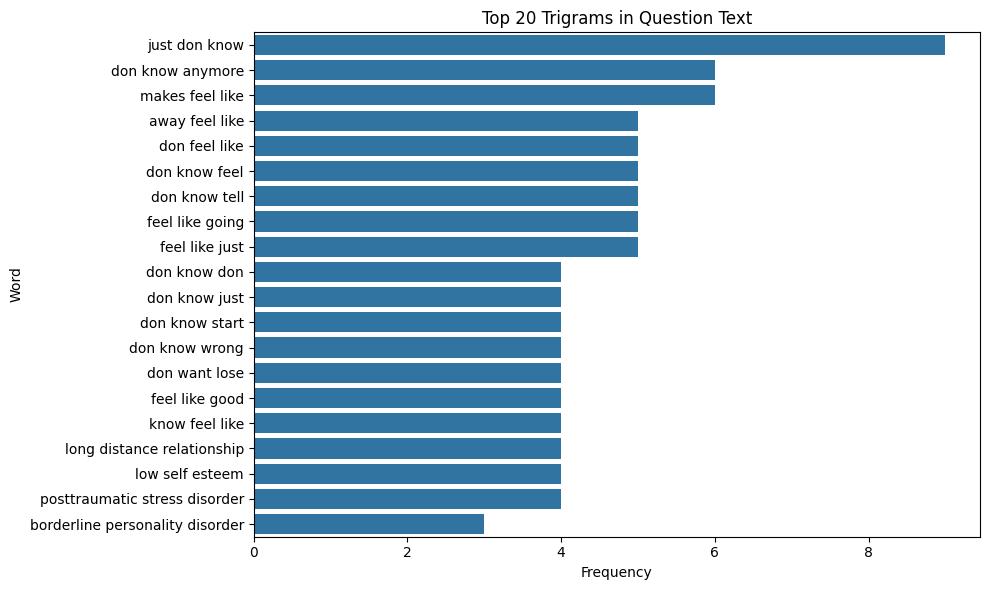

In [88]:
# Get n-grams
bigrams = get_top_ngrams(chat_data['questionText'].drop_duplicates(), ngram_range=(2,2))
trigrams = get_top_ngrams(chat_data['questionText'].drop_duplicates(), ngram_range=(3,3))

# Plot n-grams
plot_pos_freq(bigrams, 'Top 20 Bigrams in Question Text')
plot_pos_freq(trigrams, 'Top 20 Trigrams in Question Text')

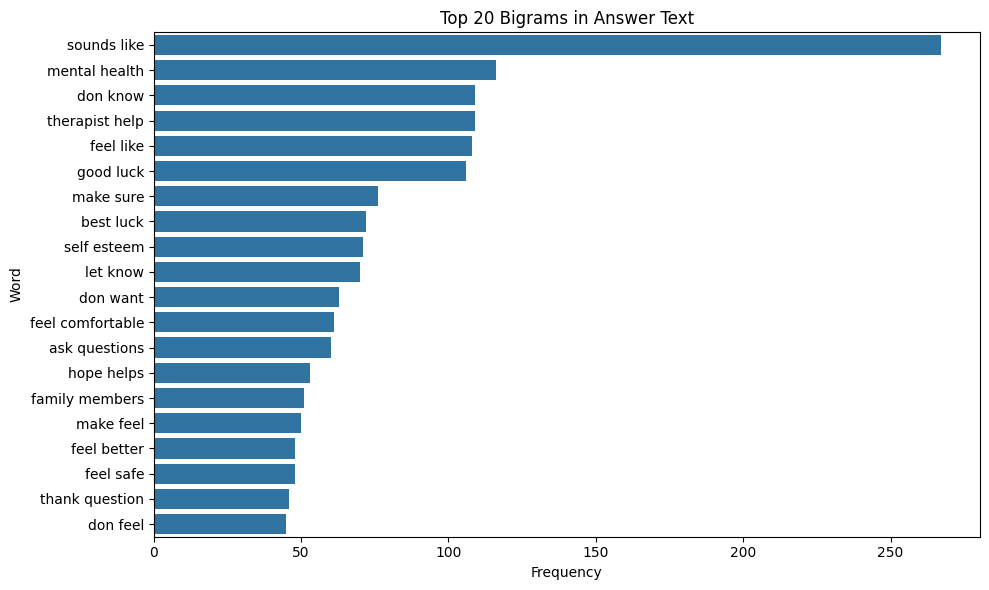

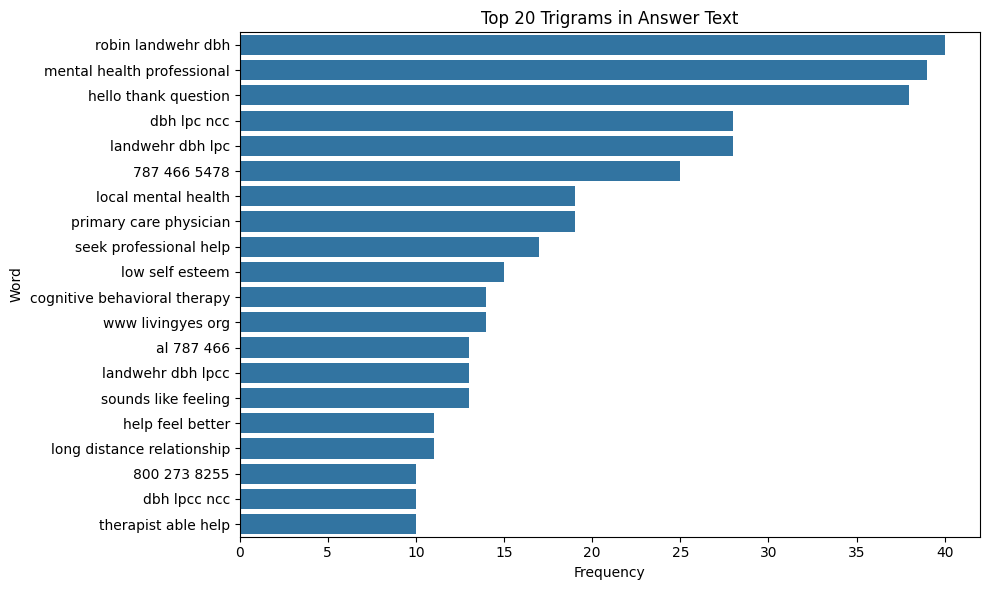

In [89]:
# Get n-grams
bigrams = get_top_ngrams(chat_data['answerText'].drop_duplicates(), ngram_range=(2,2))
trigrams = get_top_ngrams(chat_data['answerText'].drop_duplicates(), ngram_range=(3,3))

# Plot n-grams
plot_pos_freq(bigrams, 'Top 20 Bigrams in Answer Text')
plot_pos_freq(trigrams, 'Top 20 Trigrams in Answer Text')

## Step 5: Therapist Analysis

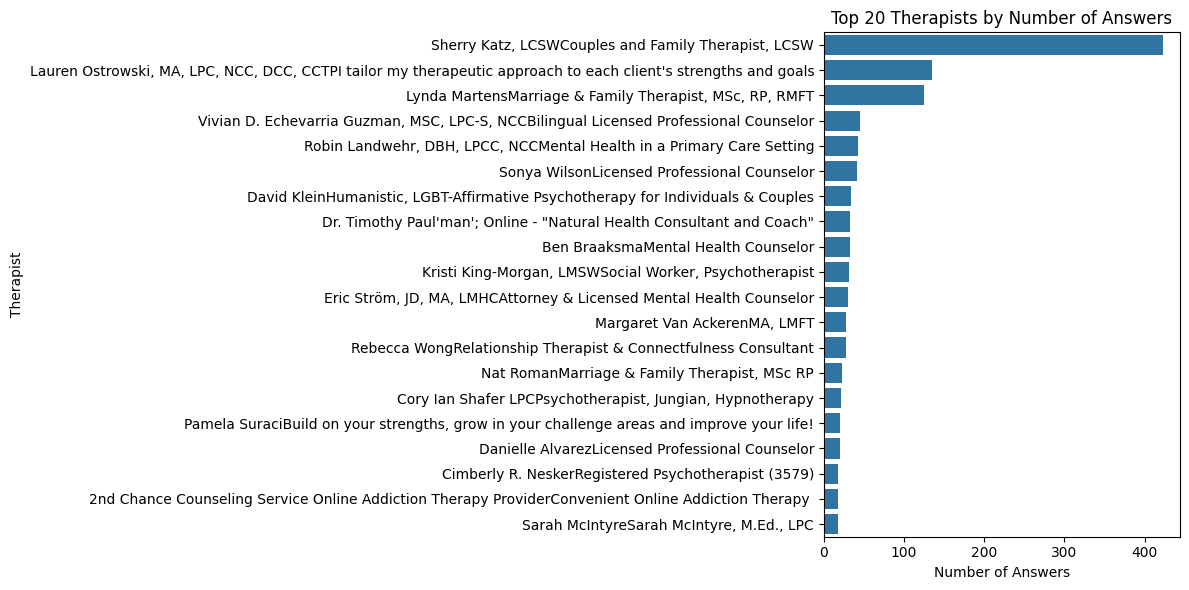

In [92]:
therapist_answer_counts = chat_data['therapistInfo'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=therapist_answer_counts.values, y=therapist_answer_counts.index)
plt.title('Top 20 Therapists by Number of Answers')
plt.xlabel('Number of Answers')
plt.ylabel('Therapist')
plt.tight_layout()
plt.show()

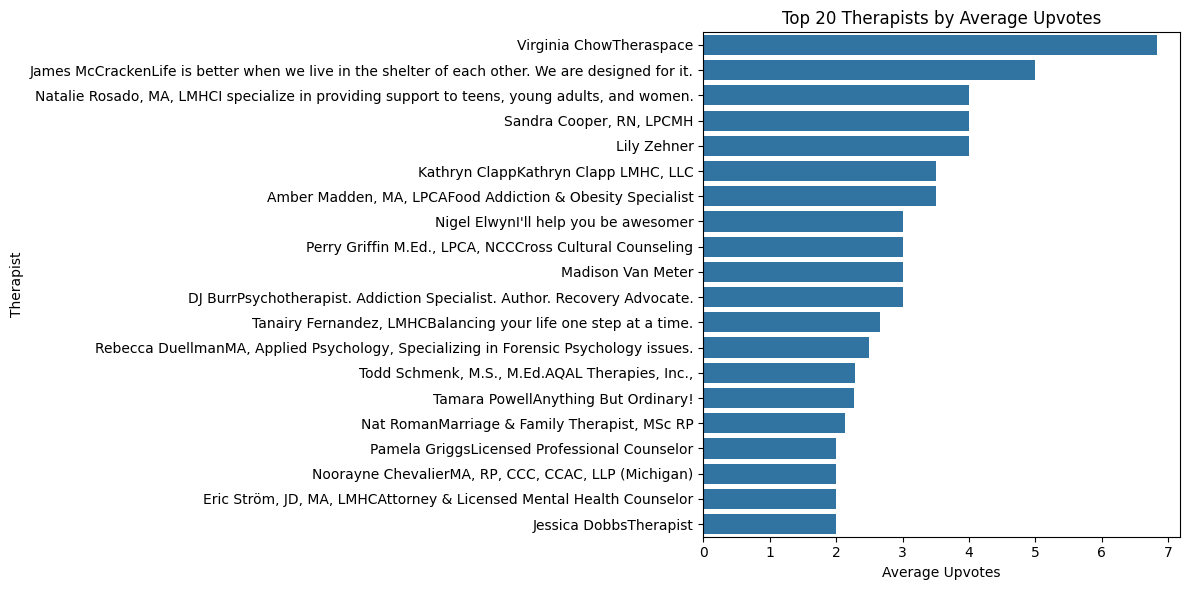

In [94]:
therapist_stats = chat_data.groupby('therapistInfo')[['upvotes', 'views']].mean().sort_values(by='upvotes', ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=therapist_stats['upvotes'], y=therapist_stats.index)
plt.title('Top 20 Therapists by Average Upvotes')
plt.xlabel('Average Upvotes')
plt.ylabel('Therapist')
plt.tight_layout()
plt.show()

### Observations and Inference

- Each question in the dataset is typically addressed by multiple answers, reflecting a many-to-one relationship between answers and questions.

- The data structure reveals a many-to-many relationship between therapists and questions, indicating that a single question may be addressed by several therapists, and each therapist may respond to multiple questions.

- Similarly, a many-to-many mapping exists between therapists and individual answers, as therapists contribute responses across various topics and contexts.

- Topics also exhibit a many-to-many association with questions, highlighting the multifaceted nature of the issues being discussed.

- Depression and Anxiety emerge as the most frequently addressed topics, indicating their prevalence in patient concerns.

- The dataset comprises 804 unique questions answered by `307` therapists, yielding a total of `2,129` responses. On average, each question receives approximately `2.61` answers. Notably, every question has been answered __at least once__, reinforcing the dataset’s completeness and potential utility in building trust with users. There are `31` topics in total.

- There is a clear opportunity to expand content for topics such as `military issues`, `self-harm`, `eating disorders`, and `addiction`. These topics exhibit disproportionately high engagement despite having relatively few answers — indicating underserved but high-demand areas.

- User-submitted questions commonly revolve around `relationships` and the `emotional challenges` they entail, suggesting a strong need for content that supports `emotional regulation, interpersonal conflict resolution, and self-awareness`.

- Linguistic analysis of therapist responses reveals a frequent use of affirming and empathetic language, with positive terms such as `happy`, `good`, `safety`, and `best` appearing prominently.

- Among the 307 therapists, `Sherry Katz` has contributed the highest number of responses, while `Virginia Chow` (Theraspace) boasts the highest average upvotes per response — a potential proxy for `credibility`, `popularity` or `user-perceived helpfulness`. These insights could inform a badge or label system (e.g., `Top Viewed`, `Most Helpful`) to enhance user trust and engagement on the platform.

